<a href="https://colab.research.google.com/github/HenriqueMAP/imersao-dados-3-alura/blob/main/Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafios da Imersão Dados 3ª Edição




## Aula 1: Python, Pandas e Pharmacia
### Desafio 01: Investigar o por quê da classe "tratamento" ser tão desbalanceada.
---
### Desafio 02: Plotar as 5 últimas linhas da tabela.
---
### Desafio 03: Proporção das classes de tratamento.
---
### Desafio 04: Quantos tipos de drogas foram investigados?
---
### Desafio 05: Procurar na documentação do Pandas sobre o método query.
---
### Desafio 06: Renomear as colunas removendo o hífen.
---
### Desafio 07: Melhorar a aparência dos gráficos, utilizando o matplotlib.pyplot.
---
### Desafio 08: Resumir o que você aprendeu.

## Resposta do Desafio 01: Investigar o por quê da classe "tratamento" ser tão desbalanceada.

### Quantidade de tratamentos utilizando drogas VS não utilizando drogas (com_controle)

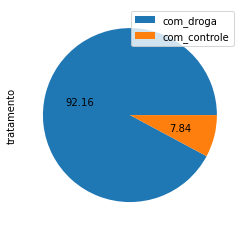

In [1]:
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
tipos_tratamentos = dados['tratamento'].value_counts().plot.pie(
    labels=None,
    autopct="%.2f",
    legend=True,
    figsize=(4, 4),
    )

Resposta (Parte 1): Embora a quantidade de tratamentos utilizando drogas seja igual a 21 948, em contrapartida, a quantidade de tratamentos sem drogas (com_controle) é igal a 1 866. A princípio parece ser uma desproporcionalidade, mas isso só fica visível dessa forma, porque a análise nesse ponto é rasa, superficial, e precisa ser aprofundada.

### Quantidade da utilização de cada tipo de substância / composto

In [2]:
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace = True)
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
18a406358       1
23d6790ad       1
796f6988f       1
161572520       1
861a693e3       1
Name: composto, Length: 3289, dtype: int64

Resposta (Parte 2): Para aprofundar essa análise, é necessário identificar se existem mais de uma substância utilizadas no tratamento sem drogas. Neste caso, é possível identificar que a substância utilizada foi apenas a denominada cacb2b860. Note que ao contar quantas vezes ela é utilizada, encontramos o mesmo valor de 1866 utilizado quando verificamos quantos tratamentos foram realizados anteriormente. Confira abaixo que somente existe essa subtância quando filtramos a coluna de "tratamento" para o valor de "com_controle".

### Verificação de substâncias utilizadas no tratamento "com_controle"

In [3]:
comcontrole = dados.query('"com_controle" in tratamento')
comcontrole['composto'].unique()

array(['cacb2b860'], dtype=object)

### Quantidade de utilização das substâncias

In [4]:
pd.crosstab(dados['composto'], dados['tratamento'])

tratamento,com_controle,com_droga
composto,,
00199ff52,0,6
00251fc41,0,6
00321ea80,0,12
0034c0847,0,6
0060e686f,0,6
...,...,...
ff9565933,0,6
ffd66e220,0,6
ffe357f8f,0,1


Resposta (Parte 3): O método crosstab do Pandas retornou a quantidade de vezes que cada tipos de substância / droga foi utilizada nos 23 814 tratamentos. 

Desse valor, sabemos que precisamos subtrair a quantidade de tratamentos realizados sem drogas, que corresponde a 1866 tratamentos. 

Assim, restam 21 948, dos quais podemos verificar com o retorno acima que são exatamente 3288 drogas utilizadas, sendo que retiramos 1 do total de linhas que o cross tab retorna devido a substância do tratamento com controle.

E se utilizarmos dados['composto'].value_counts() podemos ver que a droga mais utilizada á a denominada como 87d714366, da qual é utilizada 718 vezes. 

Agora sabendo disso, percebemos que a quantidade de tratamentos não utilizando drogas foi maior que qualquer tratamento utilizando uma droga específica. Ou seja, não existe nenhuma desproporcionalidade.

In [5]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
18a406358       1
23d6790ad       1
796f6988f       1
161572520       1
861a693e3       1
Name: composto, Length: 3289, dtype: int64

## Resposta do Desafio 02: Plotar as 5 últimas linhas da tabela.

In [6]:
dados.tail(5)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Resposta do Desafio 03: Proporção das classes de tratamento.

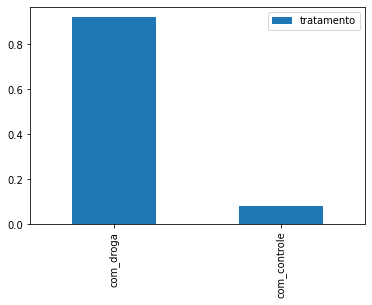

In [7]:
proporcao_tratamentos = dados['tratamento'].value_counts(normalize = True).plot.bar(legend=True)

## Resposta do Desafio 04: Quantos tipos de drogas foram investigados?

Conforme mostrado na célula abaixo, temos um total de 3289 compostos = 3288 drogas + 1 substância para tratamento sem drogas (cacb2b860).

In [8]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
18a406358       1
23d6790ad       1
796f6988f       1
161572520       1
861a693e3       1
Name: composto, Length: 3289, dtype: int64

## Resposta do Desafio 05: Procurar na documentação do Pandas sobre o método query.

In [9]:
comcontrole = dados.query('"com_controle" in tratamento')
comcontrole['composto'].unique()

array(['cacb2b860'], dtype=object)

## Resposta do Desafio 06: Renomear as colunas removendo o hífen.

In [10]:
number = 0
colunas = list(dados.columns)
titulo=[]
for number in range(number,len(colunas)):
  titulo.append(colunas[number].replace("-", " "))
  mapa={str(colunas[number]):str(titulo[number])}
  dados.rename(columns=mapa, inplace=True)
  number += 1

dados.head()

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,...,c 60,c 61,c 62,c 63,c 64,c 65,c 66,c 67,c 68,c 69,c 70,c 71,c 72,c 73,c 74,c 75,c 76,c 77,c 78,c 79,c 80,c 81,c 82,c 83,c 84,c 85,c 86,c 87,c 88,c 89,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


## Resposta do Desafio 07: Melhorar a aparência dos gráficos, utilizando o matplotlib.pyplot


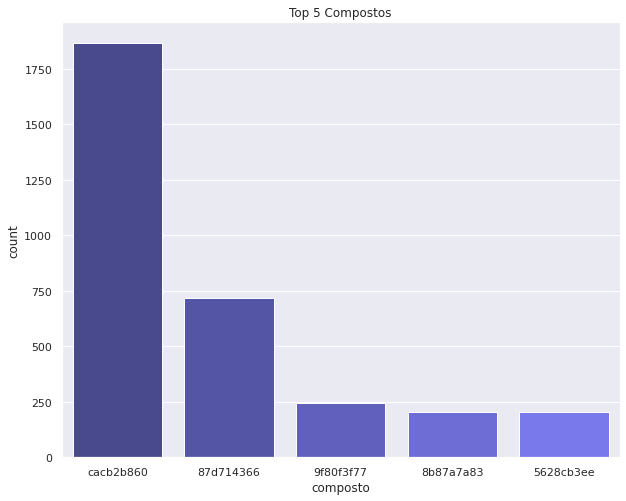

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
cod_compostos = dados['composto'].value_counts().index[0:5]
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'),  order=cod_compostos, palette=('#3d3d99', '#4747b3', '#5252cc','#5c5ce6', '#6666ff'))
ax.set_title('Top 5 Compostos')
plt.show()

## Aula 2: Estatísticas, dados e distribuições
### Desafio 01: Ordenar o gráfico countplot.
---
### Desafio 02: Alterar o tamanho da fonte.
---
### Desafio 03: Plotar os histogramas com seaborn.
---
### Desafio 04: Estudar sobre as estatísticas retornadas no método describe().
---
### Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.
---
### Desafio 06: Realizar outras análises com o boxplot e até com o histograma.


## Resposta do Desafio 01: Ordenar o gráfico countplot.

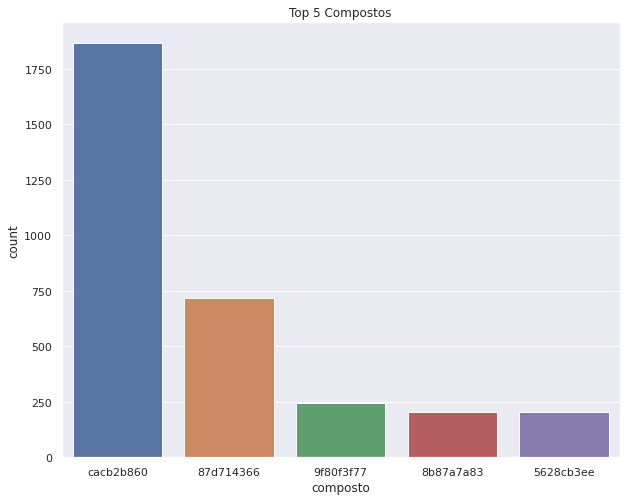

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 Compostos')
plt.show()

## Resposta do Desafio 02: Alterar o tamanho da fonte.

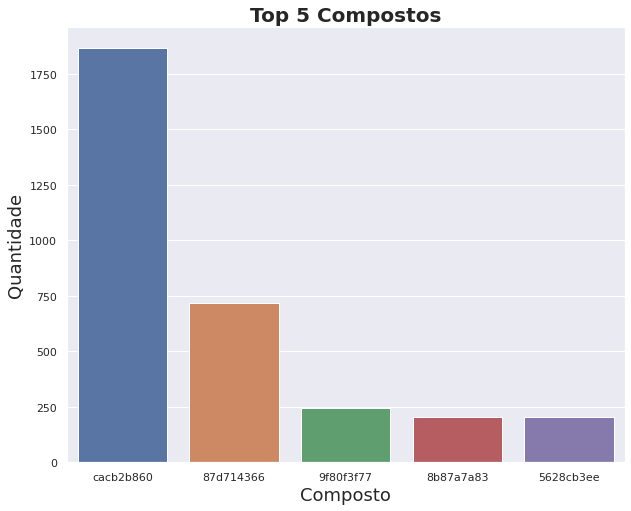

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 Compostos',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xlabel('Composto',fontdict= { 'fontsize': 18})
plt.ylabel('Quantidade',fontdict= { 'fontsize': 18})
plt.show()

## Resposta do Desafio 03: Plotar os histogramas com seaborn

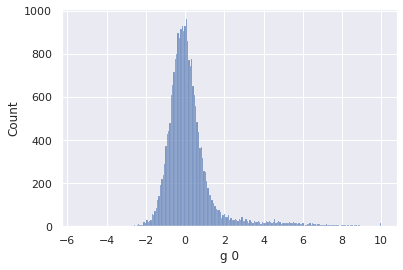

In [14]:
sns.histplot(data=dados['g 0'], bins='auto')

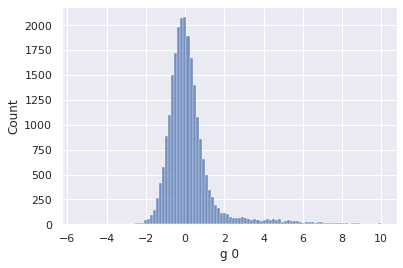

In [15]:
sns.histplot(data=dados['g 0'], bins=100, common_norm=True)

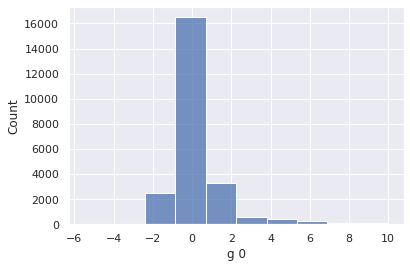

In [16]:
sns.histplot(data=dados['g 0'], bins=10)

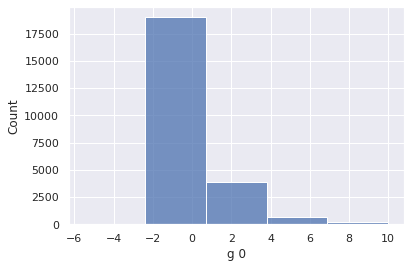

In [17]:
sns.histplot(data=dados['g 0'], bins=5)

## Resposta do Desafio 04: Estudar sobre as estatísticas retornadas no método describe().

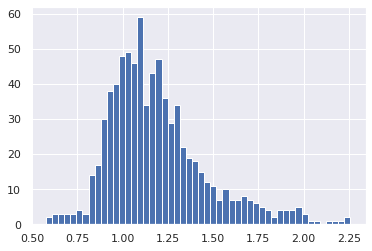

In [18]:
dados.loc[:, 'g 0':'g 771'].describe().T['std'].hist(bins=50)

## Resposta do Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.

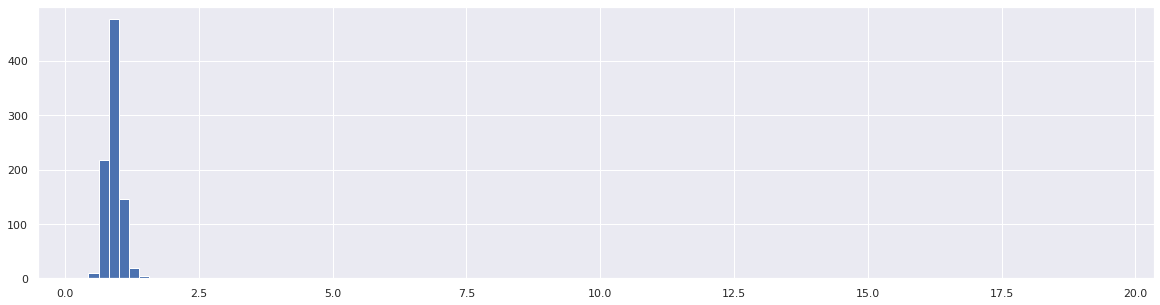

In [19]:
dados.query('"cacb2b860" in composto').describe().T['std'].hist(bins=100, figsize=(20,5))

A manipulação do tamanho das visualizações, realizada no atributo "bins", significa alterar a "resolucão" da frequência de desvios padrões (std), conforme visto no desafio anterior. Neste desafio, estamos analisando apenas o composto do tratamento com controle e, embora não conseguimos ampliar a visualização para visualizar com certeza os valores, eles estão no mesmo intervalo que o gráfico anterior. 

In [20]:
list(dados.query('"cacb2b860" in composto').describe().T['std'])

[19.395100227817395,
 0.8332481539156409,
 0.9057347986137461,
 1.016180610316052,
 0.8879711320869217,
 1.078824522651477,
 1.1316367816445088,
 0.9637180840850722,
 0.9825247703325074,
 0.7679786567439839,
 0.8822278521324616,
 0.986555378804893,
 0.8862753679371456,
 1.1928980039920096,
 0.8464410050421339,
 0.9071438567466061,
 0.642327885306669,
 1.0212179017466534,
 0.8852057333498704,
 0.6109680674704318,
 0.8480719608131905,
 0.9154842935273128,
 1.007721254703352,
 0.6892804337580065,
 0.7627105629823439,
 0.9713969127093868,
 0.7219658376263112,
 0.9392476443381536,
 1.0207880931810394,
 0.7323978034720251,
 0.8837147510627392,
 0.7791599518662816,
 0.93132771143835,
 0.8584598987826185,
 0.9389712799588733,
 0.8266170979458355,
 0.9102178104297619,
 0.986240506285857,
 0.8973154206713394,
 1.0080006552127259,
 0.7574851417456565,
 0.8388080695080599,
 0.8245744758973849,
 1.0271302454009494,
 0.9725647971698854,
 0.9182475312865249,
 1.197631319685567,
 0.5473361680679555,
 

## Resposta do Desafio 06: Realizar outras análises com o boxplot e até com o histograma.

In [21]:
list(dados.query('"cacb2b860" in composto').describe().T['std'].unique())

[19.395100227817395,
 0.8332481539156409,
 0.9057347986137461,
 1.016180610316052,
 0.8879711320869217,
 1.078824522651477,
 1.1316367816445088,
 0.9637180840850722,
 0.9825247703325074,
 0.7679786567439839,
 0.8822278521324616,
 0.986555378804893,
 0.8862753679371456,
 1.1928980039920096,
 0.8464410050421339,
 0.9071438567466061,
 0.642327885306669,
 1.0212179017466534,
 0.8852057333498704,
 0.6109680674704318,
 0.8480719608131905,
 0.9154842935273128,
 1.007721254703352,
 0.6892804337580065,
 0.7627105629823439,
 0.9713969127093868,
 0.7219658376263112,
 0.9392476443381536,
 1.0207880931810394,
 0.7323978034720251,
 0.8837147510627392,
 0.7791599518662816,
 0.93132771143835,
 0.8584598987826185,
 0.9389712799588733,
 0.8266170979458355,
 0.9102178104297619,
 0.986240506285857,
 0.8973154206713394,
 1.0080006552127259,
 0.7574851417456565,
 0.8388080695080599,
 0.8245744758973849,
 1.0271302454009494,
 0.9725647971698854,
 0.9182475312865249,
 1.197631319685567,
 0.5473361680679555,
 

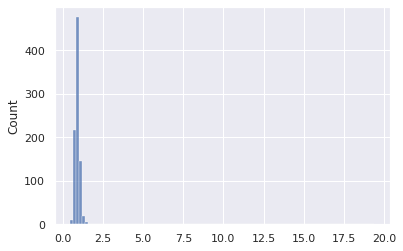

In [22]:
sns.histplot(data=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), bins=100)

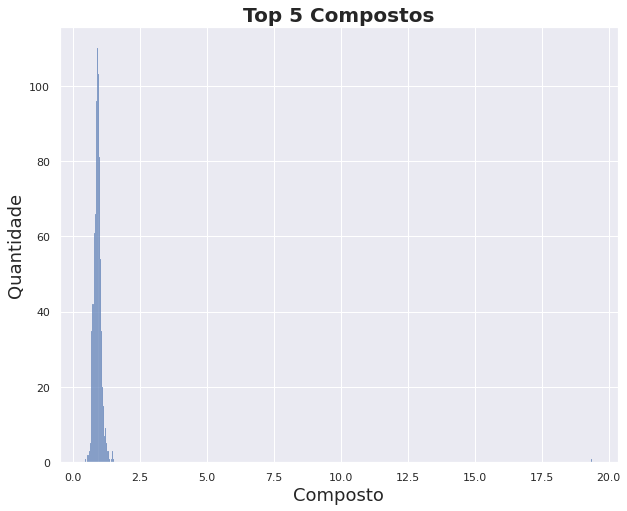

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot(data=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), bins='auto')
ax.set_title('Top 5 Compostos',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xlabel('Composto',fontdict= { 'fontsize': 18})
plt.ylabel('Quantidade',fontdict= { 'fontsize': 18})
## plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

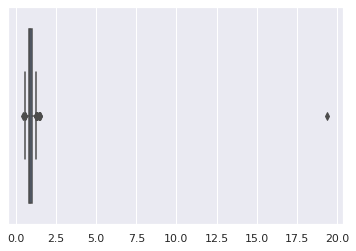

In [24]:
sns.boxplot(x=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), data=dados.query('"cacb2b860" in composto'))

In [25]:
dados.query('"cacb2b860" in composto').describe().T['std']

tempo    19.395100
g 0       0.833248
g 1       0.905735
g 2       1.016181
g 3       0.887971
           ...    
c 95      0.694797
c 96      0.740021
c 97      0.754283
c 98      0.620762
c 99      0.698150
Name: std, Length: 873, dtype: float64

In [26]:
dados.query('"cacb2b860" in composto').describe()

,tempo,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,...,c 60,c 61,c 62,c 63,c 64,c 65,c 66,c 67,c 68,c 69,c 70,c 71,c 72,c 73,c 74,c 75,c 76,c 77,c 78,c 79,c 80,c 81,c 82,c 83,c 84,c 85,c 86,c 87,c 88,c 89,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
count,1866.00000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,...,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000
mean,48.07717,-0.096364,-0.281979,-0.037559,0.090283,-0.267603,-0.085360,0.316310,-0.182888,0.395450,0.303675,0.001982,-0.058924,0.560904,0.160825,0.027359,-0.093307,0.399758,0.196112,-0.035538,-0.187553,0.270212,-0.234720,-0.242657,-0.136373,0.049421,0.240077,0.433475,-0.297664,0.429200,-0.115860,0.034545,0.146898,-0.194938,0.422112,-0.352839,0.158157,-0.082296,0.065165,-0.135357,...,0.256464,0.105946,-0.020364,0.033794,0.141150,0.169936,0.086428,0.150863,0.177403,0.177805,0.093633,0.161969,0.261134,0.468089,0.181558,0.208773,0.181058,0.114537,0.186992,0.192824,0.144163,0.198602,0.153911,0.094707,0.299793,0.150643,0.267598,0.026132,0.081472,0.026305,0.162114,0.132396,0.012933,0.273761,0.270180,0.195568,0.155791,0.161715,0.286888,0.263716
std,19.39510,0.833248,0.905735,1.016181,0.887971,1.078825,1.131637,0.963718,0.982525,0.767979,0.882228,0.986555,0.886275,1.192898,0.846441,0.907144,0.642328,1.021218,0.885206,0.610968,0.848072,0.915484,1.007721,0.689280,0.762711,0.971397,0.721966,0.939248,1.020788,0.732398,0.883715,0.779160,0.931328,0.858460,0.938971,0.826617,0.910218,0.986241,0.897315,1.008001,...,0.721539,0.681283,0.785248,0.847826,0.693472,0.656608,0.688734,0.862589,0.685118,0.679517,0.708506,0.691203,0.725634,0.698799,0.670691,0.735904,0.716457,0.740815,0.703907,0.739630,0.672806,0.911305,0.741262,0.712412,0.830997,0.729771,0.683924,0.690165,0.730209,0.681890,0.720884,0.693152,0.792459,0.698417,0.777186,0.694797,0.740021,0.754283,0.620762,0.698150
min,24.00000,-4.859000,-3.341000,-9.104000,-2.568000,-5.805000,-10.000000,-4.981000,-4.342000,-4.064000,-4.387000,-4.422000,-3.135000,-2.617000,-2.403000,-4.691000,-2.976000,-5.076000,-6.828000,-2.054000,-10.000000,-5.741000,-5.700000,-5.635000,-4.193000,-4.473000,-3.647000,-4.515000,-4.406000,-2.198000,-2.899000,-4.091000,-2.956000,-4.713000,-2.078000,-5.053000,-4.700000,-10.000000,-6.648000,-3.320000,...,-4.888000,-3.016000,-6.381000,-8.035000,-3.573000,-5.909000,-4.544000,-8.764000,-4.434000,-4.692000,-4.837000,-3.421000,-4.342000,-3.624000,-2.874000,-5.463000,-4.041000,-6.422000,-4.213000,-5.052000,-5.015000,-10.000000,-5.962000,-5.008000,-8.737000,-3.835000,-5.491000,-3.356000,-4.677000,-4.085000,-5.092000,-4.336000,-5.897000,-4.418000,-4.730000,-5.402000,-4.883000,-5.683000,-3.321000,-3.815000
25%,24.00000,-0.639000,-0.879675,-0.589150,-0.434450,-0.906775,-0.530775,-0.213975,-0.794875,-0.095325,-0.236550,-0.623950,-0.582725,-0.171375,-0.363025,-0.447025,-0.497300,-0.228900,-0.241700,-0.345675,-0.610950,-0.260425,-0.822100,-0.612600,-0.618675,-0.576750,-0.237125,-0.082800,-0.926600,-0.053050,-0.689125,-0.418325,-0.332725,-0.717850,-0.1

In [27]:
dados.query('"cacb2b860" in composto')

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,...,c 60,c 61,c 62,c 63,c 64,c 65,c 66,c 67,c 68,c 69,c 70,c 71,c 72,c 73,c 74,c 75,c 76,c 77,c 78,c 79,c 80,c 81,c 82,c 83,c 84,c 85,c 86,c 87,c 88,c 89,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.000

In [28]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
pd.set_option("display.max_columns", None)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor

In [29]:
list(dados_resultados.columns)

['id',
 '5-alpha_reductase_inhibitor',
 '11-beta-hsd1_inhibitor',
 'acat_inhibitor',
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_agonist',
 'adenosine_receptor_antagonist',
 'adenylyl_cyclase_activator',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'ampk_activator',
 'analgesic',
 'androgen_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'angiogenesis_inhibitor',
 'angiotensin_receptor_antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'apoptosis_stimulant',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp-sensitive_potassium_channel_antagonist',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibit

In [30]:
dados.query('"id_000644bb2" in id')

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g

In [31]:
list(dados.columns)

['id',
 'tratamento',
 'tempo',
 'dose',
 'composto',
 'g 0',
 'g 1',
 'g 2',
 'g 3',
 'g 4',
 'g 5',
 'g 6',
 'g 7',
 'g 8',
 'g 9',
 'g 10',
 'g 11',
 'g 12',
 'g 13',
 'g 14',
 'g 15',
 'g 16',
 'g 17',
 'g 18',
 'g 19',
 'g 20',
 'g 21',
 'g 22',
 'g 23',
 'g 24',
 'g 25',
 'g 26',
 'g 27',
 'g 28',
 'g 29',
 'g 30',
 'g 31',
 'g 32',
 'g 33',
 'g 34',
 'g 35',
 'g 36',
 'g 37',
 'g 38',
 'g 39',
 'g 40',
 'g 41',
 'g 42',
 'g 43',
 'g 44',
 'g 45',
 'g 46',
 'g 47',
 'g 48',
 'g 49',
 'g 50',
 'g 51',
 'g 52',
 'g 53',
 'g 54',
 'g 55',
 'g 56',
 'g 57',
 'g 58',
 'g 59',
 'g 60',
 'g 61',
 'g 62',
 'g 63',
 'g 64',
 'g 65',
 'g 66',
 'g 67',
 'g 68',
 'g 69',
 'g 70',
 'g 71',
 'g 72',
 'g 73',
 'g 74',
 'g 75',
 'g 76',
 'g 77',
 'g 78',
 'g 79',
 'g 80',
 'g 81',
 'g 82',
 'g 83',
 'g 84',
 'g 85',
 'g 86',
 'g 87',
 'g 88',
 'g 89',
 'g 90',
 'g 91',
 'g 92',
 'g 93',
 'g 94',
 'g 95',
 'g 96',
 'g 97',
 'g 98',
 'g 99',
 'g 100',
 'g 101',
 'g 102',
 'g 103',
 'g 104',
 'g 10

## Aula 3: Correlações e causalidade
### Desafio 01: Criar tabelas de frequência utilizando o método groupby() do Pandas.
---
### Desafio 02: Normalizar o método crosstab pela coluna.
---
### Desafio 03: Explorar outros agregadores.
---
### Desafio 04: Explorar o melt
---
### Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.
---
### Desafio 06: Estudar o código que plota a matriz de correlação heatmap.
---
### Desafio 07: Resumo do que você aprendeu com os dados.

## Desafio 01: Criar tabelas de frequência utilizando o método groupby() do Pandas.

In [43]:
dadosResultadosColumns = []
dadosResultadosColumns.append(dados_resultados.columns)

columnsLabels = []
text = "inhibitor"

for i in dadosResultadosColumns:
  if text in found = str(dadosResultadosColumns.remove(text)): 
    columnsLabels.append(dadosResultadosColumns[found])

columnsLabels
# dados_resultados.drop(labels=columnsLabels)

SyntaxError: ignored

## Aula 4: Merge e Análise de Resultados
### Desafio 01: Encontrar o top 10 das ações do MOA (inibidor, agonista,...)
---
### Desafio 02: Cria a coluna chamada eh_controle para quando na linha tratamento for igual a com_controle
---
### Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72
---
### Desafio 04: Estudar sobre combinações DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
---
### Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições. Escolher uma droga e comparar com controle.
---
### Desafio 06: Descobrir se tempo algum composto que dependendo da configuração do experimento, ativa ou não algum MOA.
---
### Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa um MOA diferente.
---
### Desafio 08: Resumir o que você aprendeu.

## Aula 05: Machine Learning e Sci-kit Learning
### Desafio 01: Tentar outros modelos ou mudar os parâmetros dos modelos que testamos na aula.
---
### Desafio 02: Estudar a documentação do Sklearn.
---
### Desafio 03: Pesquisar o fluxograma escolhendo o melhor modelo.
---
### Desafio 04: Testar outras soluções. 0, 1 ou +
---
### Desafio 05: escolha uma droga mais utilizada e tentar criar um modelo para prever essa label.